In [1]:
import pandas as pd

In [2]:
parks = pd.read_csv("national_park_trails.csv")

# Question 1.1
What is the length in miles of the fourth longest trail in California?

In [3]:
ca = parks[parks["state_name"] == "California"]

#sort values
ca_sorted = ca.sort_values(by = "length", ascending = False)
ca_sorted["length"].iloc[3]

np.float64(233676.168)

# Question 1.2

Consider an “easy” trail to be one that has an elevation gain of less than 500 meters, a distance of less than 5 kilometers, and a difficulty rating below 4

Which California National Park has the highest average rating of its “easy” trails?

In [4]:
easy = ca[(ca["elevation_gain"] < 500) & (ca["length"] < 5000) & (ca["difficulty_rating"] < 4)]

easy_sorted = easy.sort_values(by = "avg_rating", ascending = False)
easy_sorted.iloc[0,]


trail_id                                         10024378
name                             Saline Valley Hot Spring
area_name                      Death Valley National Park
city_name                                       Lone Pine
state_name                                     California
country_name                                United States
_geoloc              {'lat': 36.83402, 'lng': -117.73855}
popularity                                         6.1221
length                                            482.802
elevation_gain                                        0.0
difficulty_rating                                       1
route_type                                   out and back
visitor_usage                                         1.0
avg_rating                                            5.0
num_reviews                                             4
features               ['dogs-no', 'kids', 'hot-springs']
activities                          ['hiking', 'walking']
units         

# Question 1.3

How many National Parks contain the word “Land” somewhere in their name? (if the word appears as part of a longer word, like “Candyland”, this counts too)

In [5]:
import re

land_names = list(filter(lambda row: re.findall(r"[Ll]and", row), map(str.strip, parks["name"])))
print(len(land_names))

## OR

# turn names into one long list
names = list(parks["name"])
one_name = " ".join(names)
print(one_name)

# use regular expressions
lands = re.findall(r"[Ll]and", one_name)
len(lands)


61
Harding Ice Field Trail Mount Healy Overlook Trail Exit Glacier Trail Horseshoe Lake Trail Triple Lakes Trail Bison Gulch Rock Creek Trail Taiga Trail McKinley Station Trail Mount Thorofare Ridge Loop McKinley Bar Trail Tiaga Loop and Horseshoe Lake Trail to Beaver Dam Blueberry Hill Trail Stampede Trail to Sushana River Bartlett Cove Forest Loop Trail Camp Ridge Trail Jonesville Trail Roadside Trail Quigley Ridge Trail Bison Gulch to Denali Visitors Center Brooks Falls Bartlett River Trail McKinley Station and Morino Loop Trail Dumpling Mountain Spruce Tree Trail Bartlet Lake Trail Eldorado Creek Trail Tlingit Trail Point Gustavus Bright Angel Trail to Bright Angel Campground and River Trail South Kaibab Trail to Cedar Ridge Three-Mile Resthouse via Bright Angel Trail South Kaibab, Phantom Ranch, and Bright Angel Trail Loop  South Kaibab Trail to Ooh Aah Point Grand Canyon Rim Trail Rim-to-Rim: North Kaibab to Grand Canyon Village Shoshone Point Trail Plateau Point Trail via Bright

61

# Question 1.4
Consider the following plot, made from a dataset called np_trails_new. Although you can see the code that made the plot, you do not see the code that made the np_trails_new object.

Your job in this question is to create the np_trails_new object. You’ll know when you have succeeded, because the code provided will produce the plot.

In Canvas, turn in the values of the first row of the np_trails_new object.

In [63]:
# pivot data

np_trails_new = parks.melt(id_vars = ["trail_id"], 
                            var_name = "measure", 
                            value_vars= ["visitor_usage", "avg_rating", 
                                         "difficulty_rating", "popularity"],
                            value_name = "score")
np_trails_new.head()   

,trail_id,measure,score
0,10020048,visitor_usage,3.0
1,10236086,visitor_usage,1.0
2,10267857,visitor_usage,3.0
3,10236076,visitor_usage,2.0
4,10236082,visitor_usage,1.0


In [61]:
# convert back to wide format

np_trails = np_trails_new.pivot(index = "trail_id", 
                                columns = "measure",
                                values = "score").reset_index()
#np_trails.reset_index()

/Users/chloefeehan/.conda/envs/pythonProject/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 253 rows containing non-finite values.


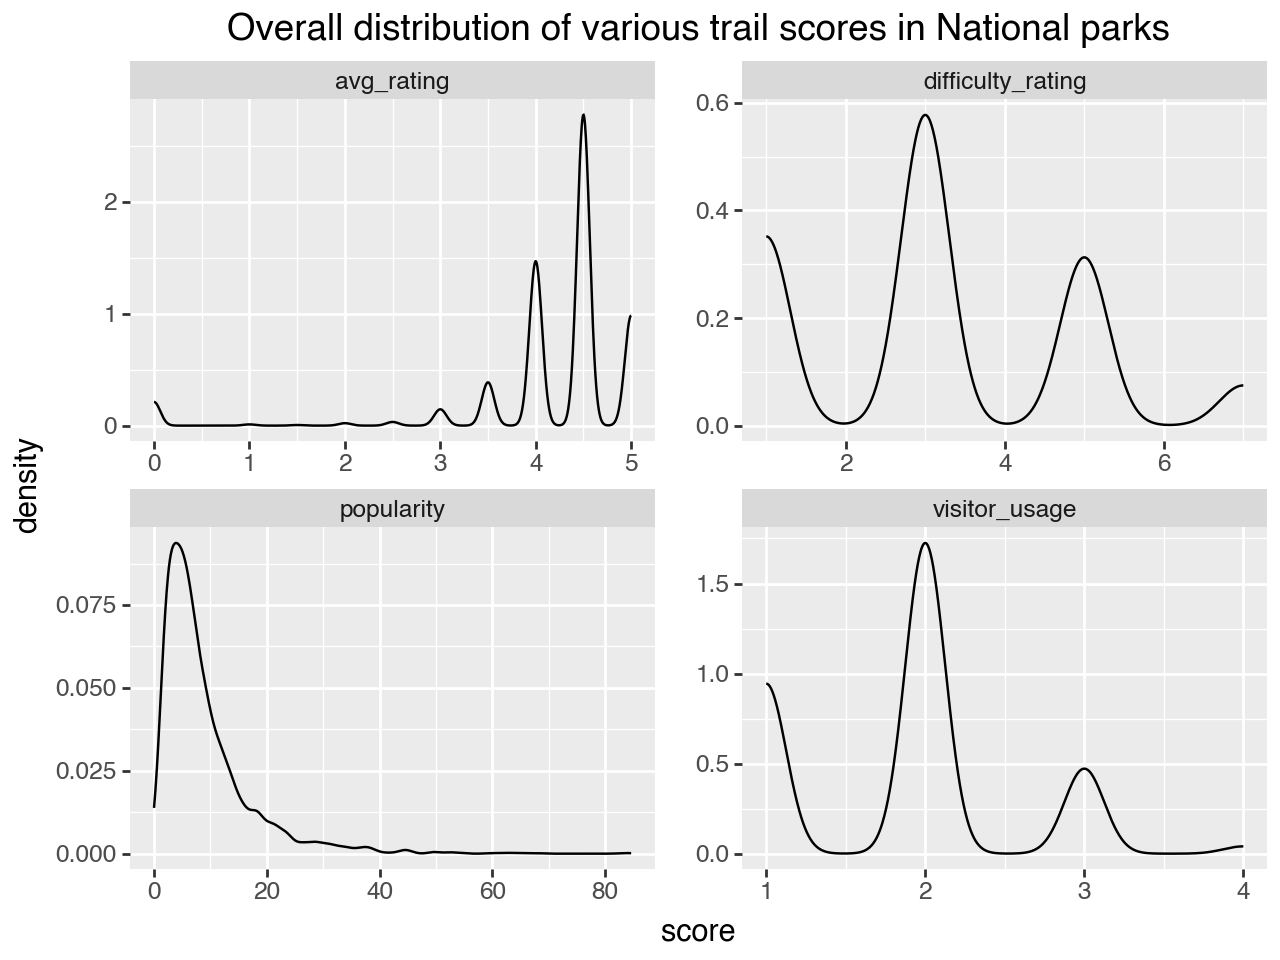

In [57]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

(ggplot(np_trails_new, aes(x="score"))
+ geom_density()
+ facet_wrap('~ measure', scales = 'free') 
+ ggtitle("Overall distribution of various trail scores in National parks")
)

# Question 1.5 [20 points]

Recreate the plot below, by filling in the blanks in the code on Canvas.


/Users/chloefeehan/.conda/envs/pythonProject/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/Users/chloefeehan/.conda/envs/pythonProject/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 54 rows containing non-finite values.


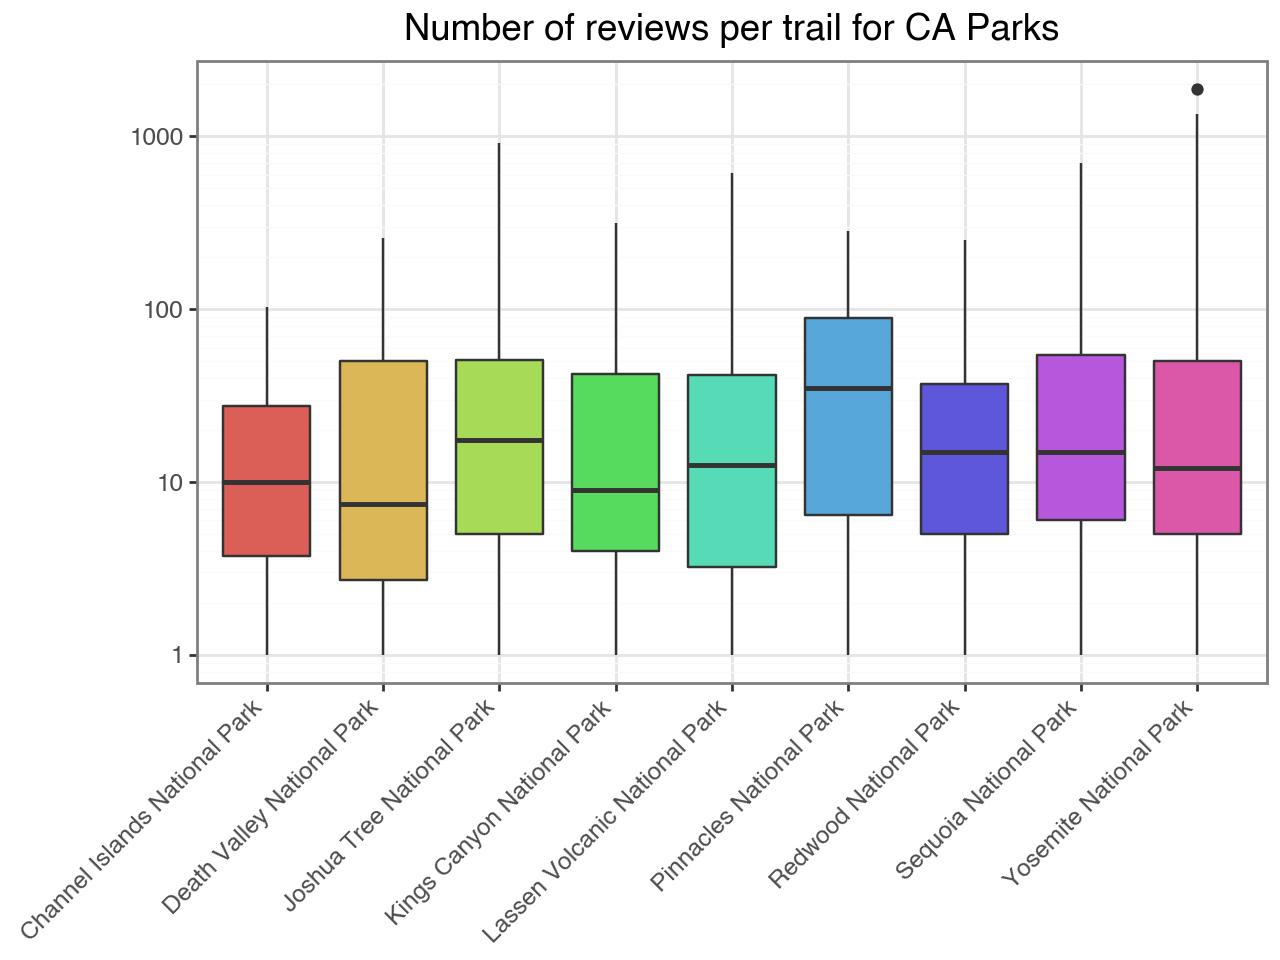

In [93]:
#from plotnine import *
from plotnine.scales import *

(ggplot(ca, aes(x="area_name", y="num_reviews", fill = "area_name"))
+ geom_boxplot()
+ scale_y_log10() 
+ scale_fill_discrete(guide=None)
+ labs(
  x = "",
  y = "",
  title = "Number of reviews per trail for CA Parks"
)
+ theme_bw()
+ theme(axis_text_x = element_text(rotation = 45, hjust=1)) 
)

# Part Two: Programming

# Question 2.1
Write a functions to help recommend trails to a user. The function will have as its input the dataset and the name of a National Park, and the following optional arguments:

A minimum trail elevation gain (in meters)

A maximum trail elevation gain (in meters)

A minimum trail rating

The type of trail
(Note: “optional” here means that the function can run even if the user doesn’t supply these arguments, not that they are optional for you to include in your function definition.)

The function should return all the trails that fit the supplied criteria. You may assume that the variable names of any inputted dataset match the np_trails dataset.

Here is some starter code for this function:

In [47]:
def recommend_trails(dataset, park_name, min_elev = None, max_elev = None, min_rating = None):

  if min_elev is None:
    min_elev = 0
  if max_elev is None:
    max_elev = 1000000000
  if min_rating is None:
    min_rating = 0
  # if trail_type is None:
  #   trail_type
  
  # search dataset for park_name
  park = dataset[(dataset["area_name"] == park_name) &
                  (dataset["elevation_gain"] >= min_elev) &
                  (dataset["elevation_gain"] <= max_elev) &
                  (dataset["difficulty_rating"] >= min_rating)]
  
  return park

In [48]:
recommend_trails(parks, "Haleakala National Park")

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3299,10005997,Pipiwai Trail and Waimoku Falls,Haleakala National Park,Hana,Maui,Hawaii,"{'lat': 20.66233, 'lng': -156.04445}",33.3147,5471.756,249.9360,3,out and back,4.0,5.0,697,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'hiking', 'nature-trips', 'trail-r...",m
3300,10002035,Sliding Sands Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71473, 'lng': -156.25053}",23.5557,17702.740,851.9160,7,out and back,3.0,4.5,355,"['dogs-no', 'views', 'wild-flowers']","['birding', 'camping', 'hiking', 'nature-trips...",m
3301,10028926,Seven Sacred Pools Trail ('Ohe'o Gulch),Haleakala National Park,Hana,Maui,Hawaii,"{'lat': 20.662, 'lng': -156.04514}",19.7384,965.604,32.9184,1,loop,3.0,4.0,201,"['dogs-no', 'forest', 'kids', 'river', 'views'...","['birding', 'hiking', 'nature-trips', 'walking']",m
3302,10040498,Halalai'i and Pu'unaue Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71417, 'lng': -156.25093}",16.6764,20116.750,978.7128,5,loop,1.0,5.0,91,"['dogs-no', 'views', 'waterfall', 'wild-flower...","['backpacking', 'birding', 'camping', 'hiking'...",m
3303,10011093,Halemau'u Haleakala Overlook Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.75236, 'lng': -156.22844}",15.8383,12230.984,723.9000,5,out and back,1.0,4.5,126,"['dogs-no', 'views', 'wildlife']","['hiking', 'trail-running']",m
3304,10284542,Haleakala Crater Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71449, 'lng': -156.25072}",13.5643,18024.608,930.8592,5,point to point,1.0,5.0,99,"['dogs-no', 'views']","['backpacking', 'camping', 'hiking', 'nature-t...",m
3305,10027793,Pa Ka'oao Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71479, 'lng': -156.25102}",11.5722,965.604,40.8432,3,loop,2.0,4.5,34,"['dogs-leash', 'kids', 'views', 'wild-flowers'...","['hiking', 'nature-trips', 'walking']",m
3306,10236002,Leleiwi Overlook Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.74424, 'lng': -156.23037}",10.5442,482.802,30.7848,1,out and back,3.0,4.5,43,"['dogs-no', 'kids', 'views']","['hiking', 'walking']",m
3307,10236006,Pa ka'oao Trail (White Hill Trail),Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71442, 'lng': -156.25102}",9.5362,804.670,32.9184,1,out and back,2.0,4.5,39,"['dogs-no', 'kids', 'views']","['hiking', 'walking']",m
3308,10008302,Silversword Loop Via Halemau'u Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.75275, 'lng': -156.22884}",9.3861,20116.750,1105.8144,5,loop,2.0,4.5,43,"['dogs-no', 'views', 'wild-flowers']","['birding', 'hiking', 'nature-trips']",m


In [33]:
recommend_trails(parks, "Haleakala National Park", min_elev = 1000, min_rating = 4)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units


In [21]:
#parks[parks["difficulty_rating"] > 2][["difficulty_rating"]].mean()

np.float64(0.7328705101116813)

In [38]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

def scrape_temps(month = None):
  
  my_url = "https://www.extremeweatherwatch.com/us-state-averages"
  response = request.get(my_url)
  soup = BeautifulSoup(response.content, "html.parser")
  
    
    
  ## More of your code here
  
  
  return ______

In [39]:
my_url = "https://www.extremeweatherwatch.com/us-state-averages"
response = requests.get(my_url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find_all("table", attrs = {"class" : "bordered-table sort-table"})
#print(table)

#table.find_all()




# Question 2.3

I am looking for a trail that is:

1000-3000 meters of elevation (I like mountains, but not too big.)

Rated at least a 4.5 on average

A loop trail (I don’t like to retrace my steps)

Not too cold in the summer, even at the peak

Use your recommend_trails function to find me a few good options.

Use your second function (scrape_temps) to gather information on temperatures for the summer months (i.e. May, June, July, August) in the states for these trails.

Merge these two datasets, so I can see all the recommended trails alongside their summer temps. If you were unable to scrape the information from the website, then feel free to import the temp_data.csv file and use average temperatures instead of summer temperatures to complete this question.

Convert the temperatures of the states to be the temperatures at the peak elevation of my recommended hikes. The temperature decreases by about 5.4 degrees Fahrenheit (or 9.8 degrees Celsius) for every 1000 feet you go up in elevation